
In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_inversion` in order to produce samples from the below distribution using rejection sampling:

$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \frac{e^{x^2}-1}{e-1}, & 0 < x < 1 \\
        1, & x \geq 1
    \end{cases}
$$

2. [2p] Produce 100000 samples (**use fewer if it times-out and you cannot find a solution**) and put the answer in `problem1_samples` from the above distribution and plot the histogram together with the true density. *(There is a timeout decorator on this function and if it takes more than 10 seconds to generate 100000 samples it will timeout and it will count as if you failed to generate.)*
3. [2p] Use the above 100000 samples (`problem1_samples`) to approximately compute the integral

$$
    \int_0^{1} \sin(x) \frac{2e^{x^2} x}{e-1} dx
$$
and store the result in `problem1_integral`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the integral above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Fill in the remaining part of the function `problem1_inversion_2` in order to produce samples from the below distribution using rejection sampling:
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        20xe^{20-1/x}, & 0 < x < \frac{1}{20} \\
        1, & x \geq \frac{1}{20}
    \end{cases}
$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least 9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000 samples within 2 seconds.

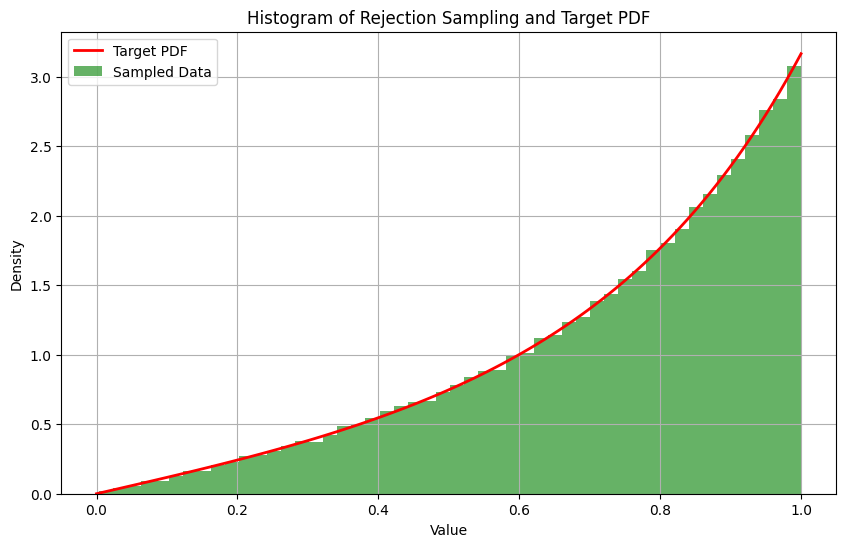

In [2]:
# 1.拒绝采样生成样本
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import uniform

def problem1_inversion():
    def target_pdf(x):
        return (2 * np.exp(x**2) * x) / (np.exp(1) - 1)
    
    def proposal_pdf(x):
        return 1
    
    M = 2 * np.exp(1) / (np.exp(1) - 1)    # f(x)<=M*g(x),所以M是f(x)/g(x)的最大值
    
    def rejection_sampling(target_pdf, proposal_pdf, M, n_samples):
        samples = []
        while len(samples) < n_samples:
            x = np.random.uniform(0,1)  # Sample from uniform distribution [0, 1]
            u = np.random.uniform(0,1)  # Sample from uniform distribution [0, 1]
            # u要小于f(x)/M*g(x)的值
            if u < target_pdf(x) / (M * proposal_pdf(x)):   
                samples.append(x)
        return np.array(samples)
  
    problem1_samples = rejection_sampling(target_pdf, proposal_pdf, M, 100000)
    
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, color='g')
    
    # Plotting the target probability density function
    x = np.linspace(0, 1, 100)
    y = target_pdf(x)
    plt.plot(x, y, 'r-', linewidth=2)
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Histogram of Rejection Sampling and Target PDF')
    plt.legend(['Target PDF', 'Sampled Data'])
    plt.grid(True)
    plt.show()
    
    return problem1_samples

problem1_samples = problem1_inversion()


In [3]:
# 2.计算蒙特卡洛积分
def monte_carlo_integral(samples):
    integrand = np.sin(samples) * (2 * np.exp(samples**2) * samples) / (np.exp(1) - 1)
    integral = np.mean(integrand)
    return integral

problem1_integral = monte_carlo_integral(problem1_samples)
print(f"Monte Carlo integral estimate: {problem1_integral}")


Monte Carlo integral estimate: 1.2458853003538404


In [4]:
# 3.使用Hoeffding's不等式计算95%的置信区间：

def hoeffding_confidence_interval(samples, integral_estimate, confidence_level=0.95):
    n = len(samples)
    epsilon = np.sqrt(np.log(2 / (1 - confidence_level)) / (2 * n))
    lower_bound = integral_estimate - epsilon
    upper_bound = integral_estimate + epsilon
    return (lower_bound, upper_bound)

problem1_interval = hoeffding_confidence_interval(problem1_samples, problem1_integral)
print(f"95% confidence interval: {problem1_interval}")


95% confidence interval: (1.241590606270373, 1.2501799944373078)


In [ ]:
# 4. 拒绝采样生成另一分布的样本
def problem1_inversion_2():
    def target_pdf(x):
        return 20 * x * np.exp(20 - 1/x) if 0 < x <= 1/20 else 0
    
    def proposal_pdf(x):
        return 20 if 0 < x <= 1/20 else 0
    
    M = 20 * np.exp(20) / (20 / 20)
    
    def rejection_sampling(target_pdf, proposal_pdf, M, n_samples):
        samples = []
        while len(samples) < n_samples:
            x = uniform.rvs(loc=0, scale=1/20)
            u = uniform.rvs(loc=0, scale=1)
            if u < target_pdf(x) / (M * proposal_pdf(x)):
                samples.append(x)
        return np.array(samples)
    
    np.random.seed(0)
    problem1_samples_2 = rejection_sampling(target_pdf, proposal_pdf, M, 100000)
    
    return problem1_samples_2

problem1_samples_2 = problem1_inversion_2()


# 用拒绝采样的方式生成目标函数
$f(x)=3x^2$,for $0\le x \le1$

Monte Carlo estimation:0.6013975871776642
Exact value of the integral:0.3333333333333333


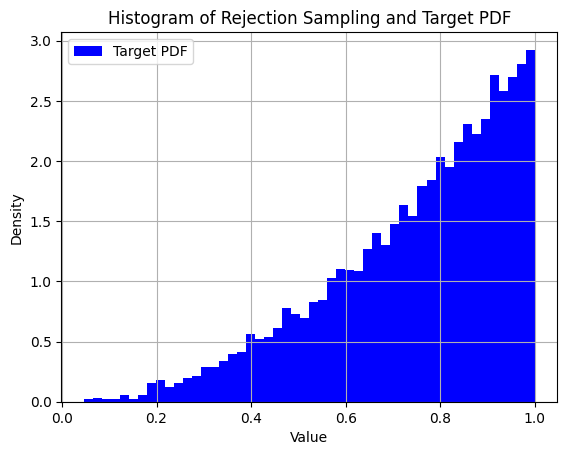

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    if 0<=x<=1:
        return 3*x**2
    else:
         return 0
    
# 提议函数
def g(x):
    return 1 if 0<=x<=1 else 0
    
def rejection_sampling(f,g,M):
    samples=[]
    for _ in range(N):
        while True:
            x=random.uniform(0,1)
            u=random.uniform(0,1)
            if u<f(x)/(M*g(x)):
                samples.append(x)
                break
    return samples

def monte_carlo_integration(samples,function):
    integral=sum(function(x) for x in samples)/len(samples)
    return integral

N=10000
M=3

samples=rejection_sampling(f,g,M)

mc_estimate=monte_carlo_integration(samples,lambda x:x**2)

exact_value=1/3

print(f'Monte Carlo estimation:{mc_estimate}')
print(f'Exact value of the integral:{exact_value}')

plt.hist(samples,bins=50,density=True,color='blue')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Rejection Sampling and Target PDF')
plt.legend(['Target PDF', 'Sampled Data'])
plt.grid(True)
plt.show()

     
